# Titanic Dataset Exploration in Python


we will explore titanic dataset, found [here](https://www.kaggle.com/c/titanic). Using Pandas and Matplotlib libraries.

## Steps 

1. Identify Data Types
2. Explore Each Variable
3. Find Relationships 


## Introduce the Data
Import data by clicking **insert to code** from **Find and add data** on the right

In [69]:
# Insert data here
# Change df_data_1 to df 

In [70]:
# Importing Libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Seaborn style
sns.set_style("whitegrid")
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")

### Step 1: Identify Data Types

In [72]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Step 2: Explore Each Variable

### A. Numerical Variables

#### Central Tendency:

In [73]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#### Histogram:

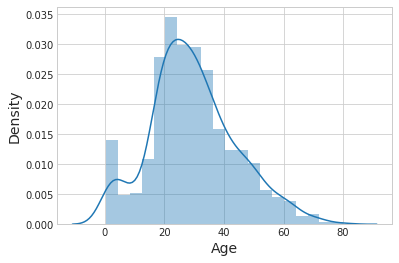

In [74]:
# Density by Age

sns.distplot(df['Age'].dropna());
plt.xlabel('Age', fontsize=14);
plt.ylabel('Density', fontsize=14);
plt.show()

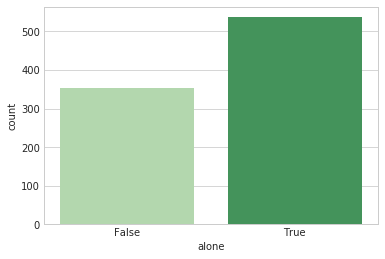

In [75]:
# Parch and SibSp

df["alone"] = ~(df.Parch + df.SibSp).astype(bool)
sns.countplot("alone", data=df, palette="Greens");


### B. Categorical Variables


**- Numerical Summaries**:

In [76]:
categorical_df = df.dtypes[df.dtypes == "object"].index
df[categorical_df].describe().transpose()

,count,unique,top,freq
Name,891,891,"Andrew, Mr. Edgardo Samuel",1
Gender,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


**- Bar plot:**

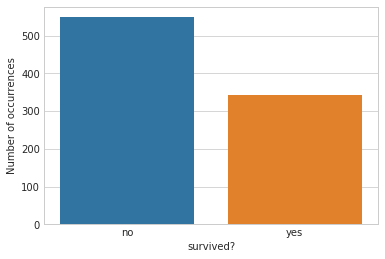

In [77]:
# Survived Count

df["survived2"] = df.Survived.map({0: "no", 1: "yes"})
sns.countplot(df.survived2);
plt.xlabel('survived?');
plt.ylabel('Number of occurrences');
plt.show()

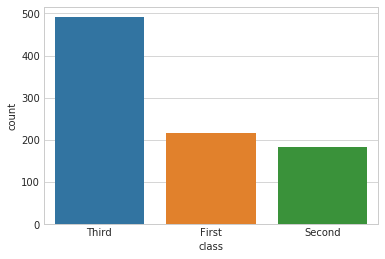

In [78]:
# Pclass Count

df["class"] = df.Pclass.map({1: "First", 2: "Second", 3: "Third"})
sns.countplot(x="class", data=df)
plt.show()

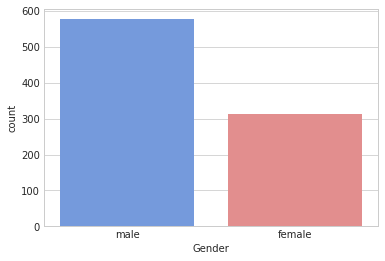

In [79]:
# Gender Count

sns.countplot("Gender", data=df, palette=pal);

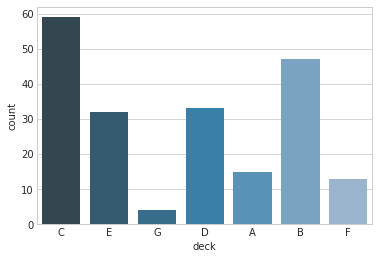

In [80]:
# Deck Count

df["deck"] = df.Cabin.str[0].map(lambda s: np.nan if s == "T" else s)
sns.countplot("deck", data=df, palette="PuBu_d");

### Step 3: Find Relationships

**B. Categorical-Categorical**

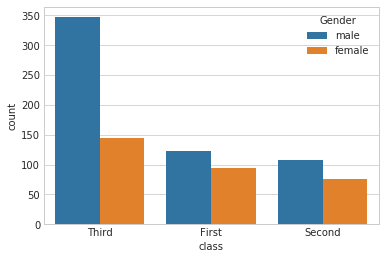

In [81]:
# Class Count by Gender

sns.countplot(x="class", hue="Gender", data=df)
plt.show()

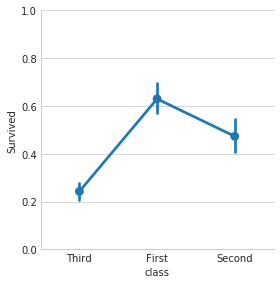

In [82]:
#Survival Rate by Class

sns.factorplot("class", "Survived", data=df).set(ylim=(0, 1))
plt.show()

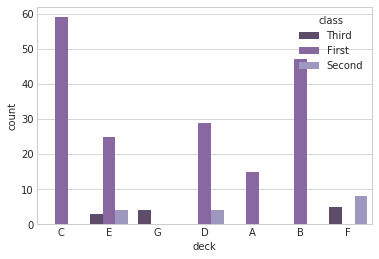

In [83]:
# Deck Count by Class

sns.countplot("deck", hue="class", data=df, palette="BuPu_d");

**C. Numerical-Categorical**

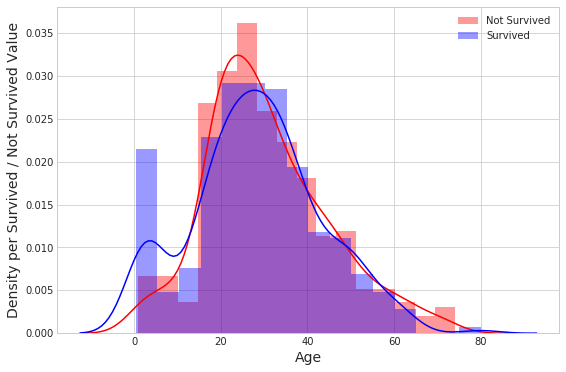

In [84]:
# Density of Survived by Age

fig = plt.figure(figsize=(9,6)) 
sns.distplot(df.loc[df.Survived==0, 'Age'].dropna(), 
             color='red', label='Not Survived');
sns.distplot(df.loc[df.Survived==1, 'Age'].dropna(), 
             color='blue', label='Survived');
plt.legend(loc='best')
plt.xlabel('Age', fontsize=14);
plt.ylabel('Density per Survived / Not Survived Value', fontsize=14);
plt.show()

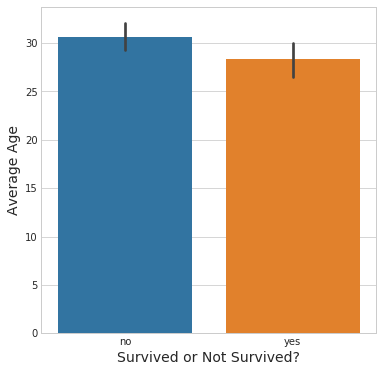

In [85]:
# Count of Survived by Age 

fig = plt.figure(figsize=(6,6)) 
sns.barplot(x="survived2", y="Age", data=df);
plt.xlabel('Survived or Not Survived?', fontsize=14);
plt.ylabel('Average Age', fontsize=14);
plt.show()

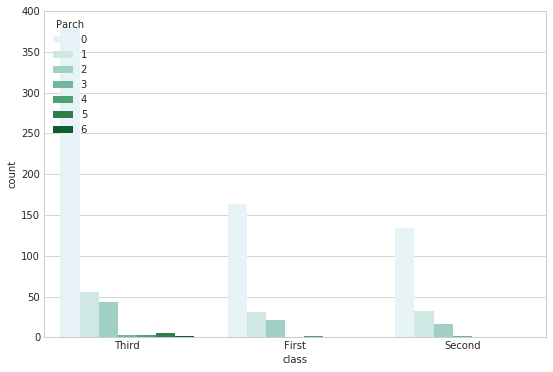

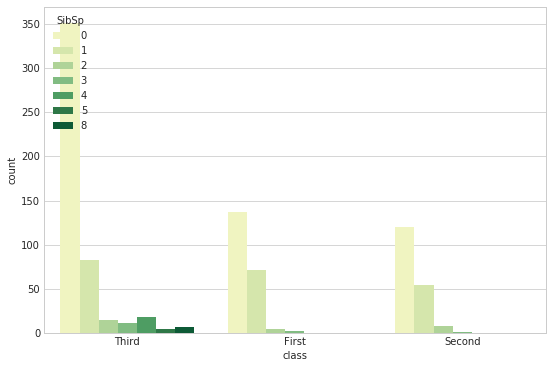

In [86]:
# Count of Parch by Class

fig = plt.figure(figsize=(9,6)) 
sns.countplot("class", data=df, hue='Parch', palette="BuGn");

# Count of SibSp by Class

fig = plt.figure(figsize=(9,6)) 
sns.countplot("class", data=df, hue='SibSp', palette="YlGn");

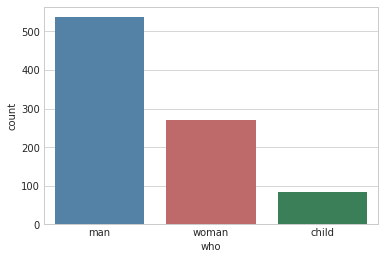

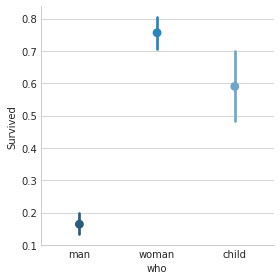

In [87]:
# Age and Gender 

def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

df["who"] = df[["Age", "Gender"]].apply(woman_child_or_man, axis=1) 

sns.countplot("who", data=df, palette=pal);
sns.factorplot("who", "Survived", data=df, palette="PuBu_d");


## Exercise


In [89]:
# Do a factorplot with x= alone , y = Survived, and hue=Gender